# Implementing the linear regression using numpy
-  DataSet is in reg.csv file in which we have only one feature 'Population' of a city in which a truck country is operating And Target Value is the Profit*10,000 dollars. This is the simple linear regression containing one feature.

-  hyphothesis is given by: h(x) = θ◦ + θ1 * X   where theta0 is the intercept of the linear line and theta1 is the slope of the line. 

-  Our aim is to minimise the cost function in order to make the best fit line passing through the datapoints

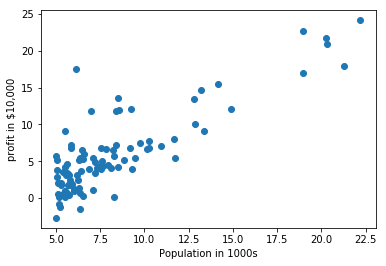

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df=pd.read_csv("reg.csv")
df=df.loc[:,{'Population','Profit'}]
plt.scatter(df.Population,df.Profit)
plt.xlabel('Population in 1000s')
plt.ylabel('profit in $10,000')
plt.show()


In [2]:
import numpy as np

In [3]:
population_array=df.Population.as_matrix().reshape(97,1)
profit_array=df.Profit.as_matrix().reshape(97,1)


In [4]:
X_data=np.column_stack((np.ones_like(population_array),population_array))


In [5]:
theta=np.zeros((2,1))

# Cost computation using ordinary least squared method

In [6]:
def computeCost(X,Y,theta):
    return (1.0/(2*len(X)))*np.sum(np.power(np.dot(X,theta)-Y,2))
computeCost(X_data,profit_array,theta)

32.072733877455676

In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = len(y) # number of training examples
    
    cost=[]
    numIter=[]
    theta_array=[]
    for i in range(num_iters):
        y_estimate=np.dot(X,theta)
        
        error=y_estimate-y
       
        theta=theta-alpha*(1.0/m)*np.dot(X.T,error)
        numIter.append(i)
        cost.append(computeCost(X,y,theta))
        theta_array.append(theta)
 
    return (theta,cost,numIter,theta_array)    
    


    



In [8]:
returned_theta,cost,numIter,theta_array=gradientDescent(X_data,profit_array,theta,0.01,1500)  
print(returned_theta)  #printing the returned value of theta matrix

[[-3.63029144]
 [ 1.16636235]]


In [9]:
y_pred=returned_theta[0]+returned_theta[1]*7.0708        #predicting a value when population is given
print(y_pred)

[ 4.61682347]


# drawing a curve of cost function vs number of iterations

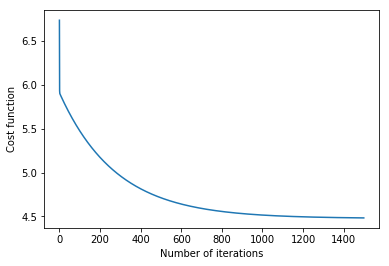

In [10]:
plt.plot(numIter,cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.show()


# The curve showing the best fit line

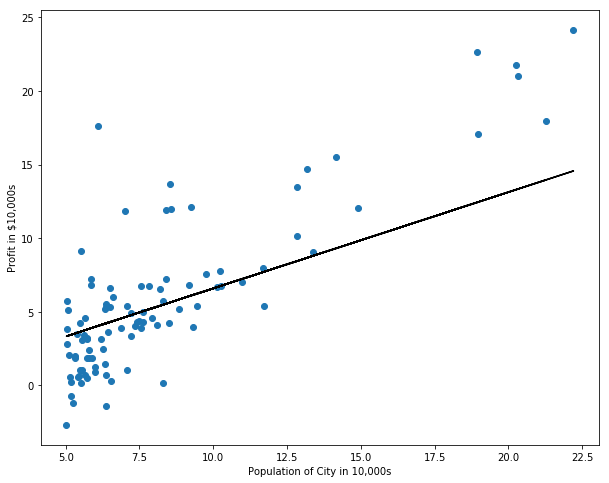

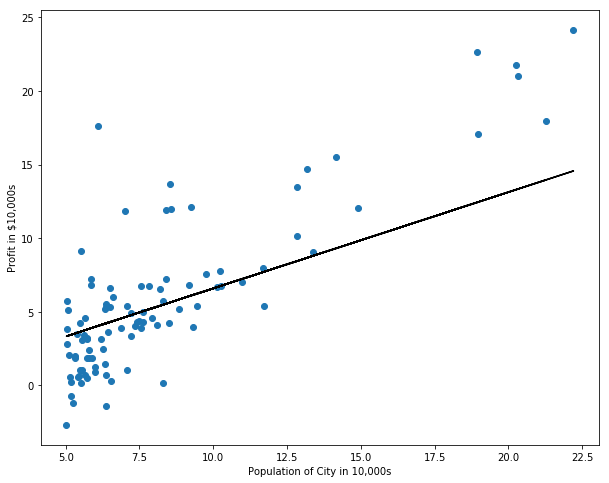

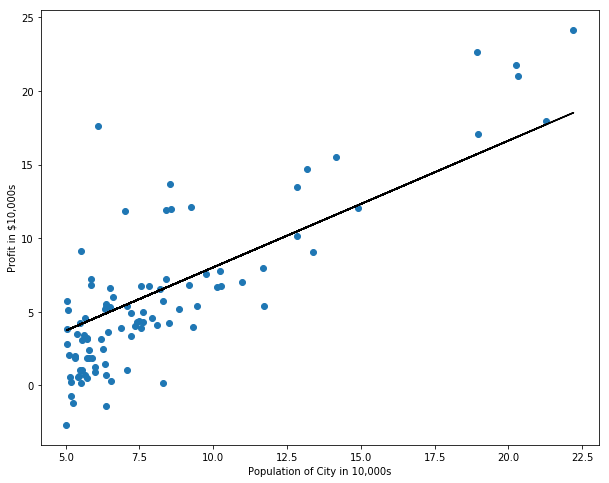

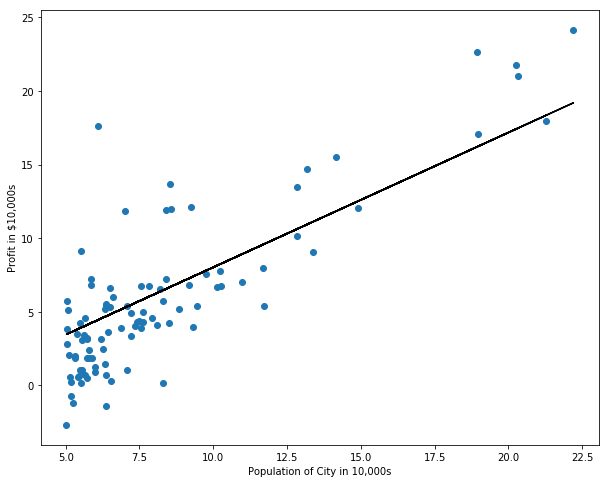

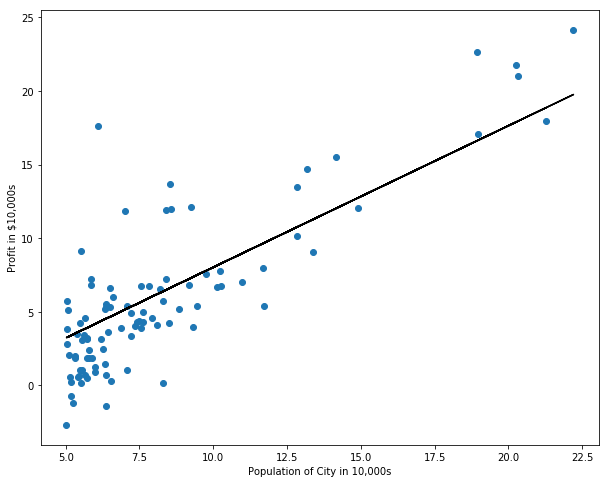

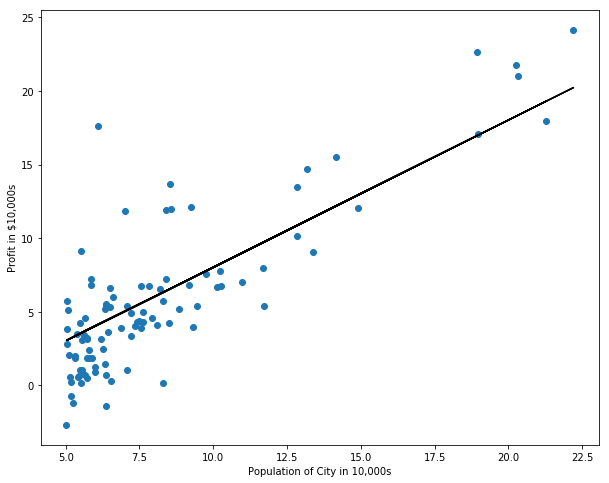

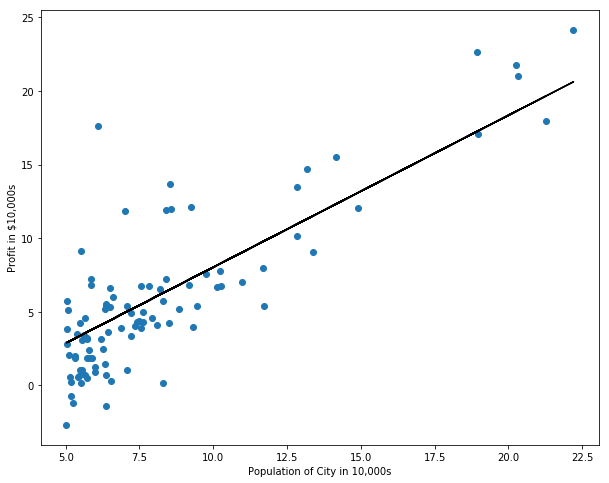

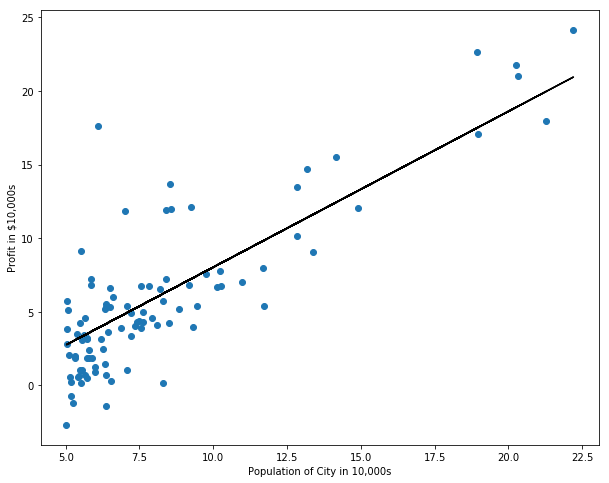

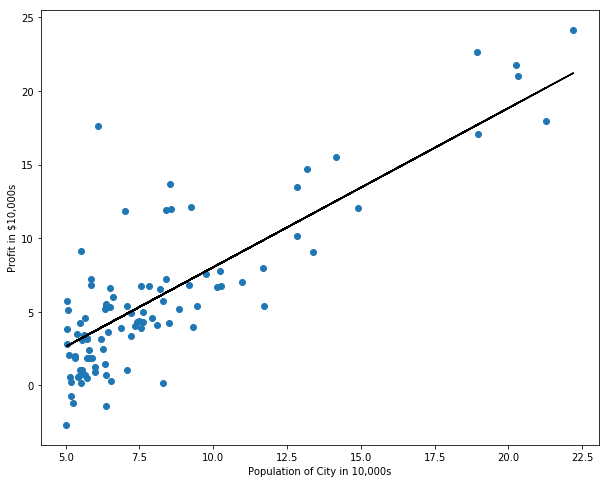

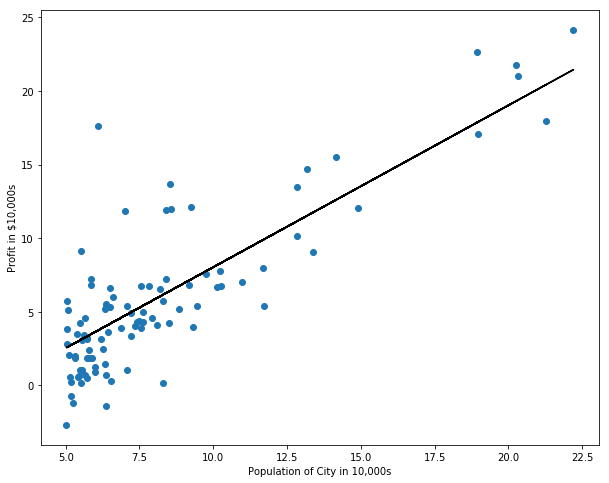

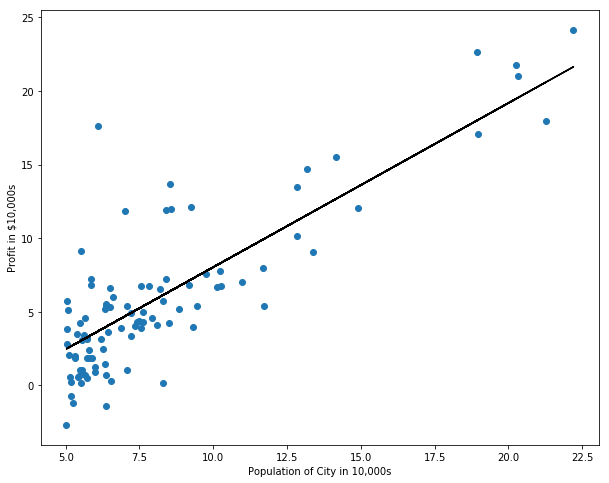

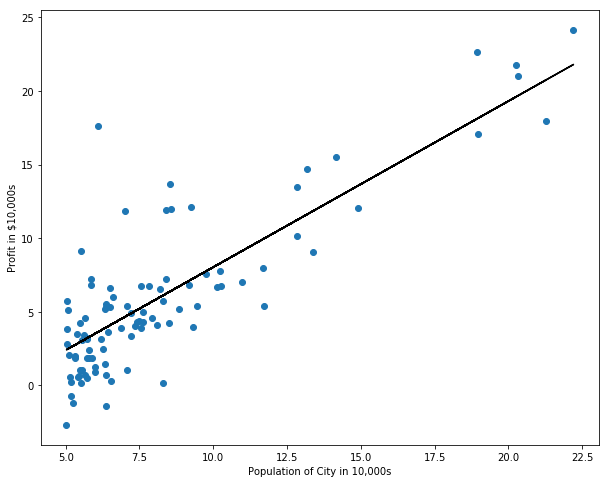

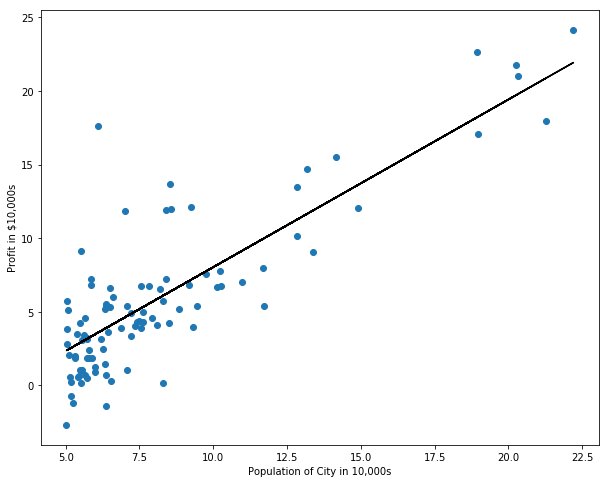

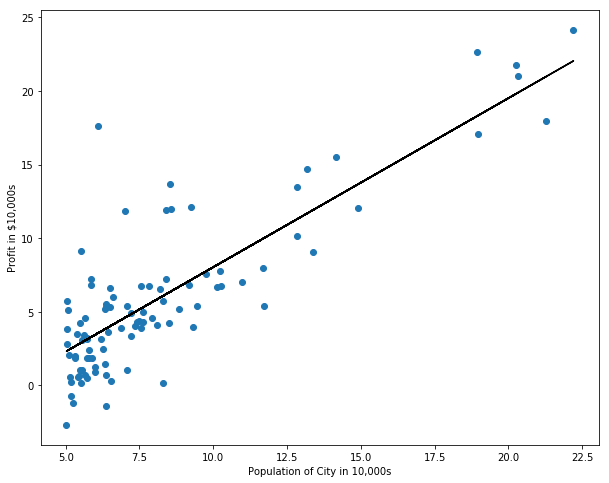

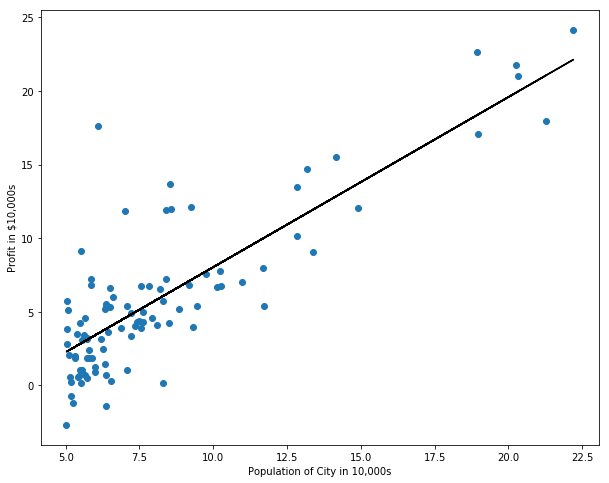

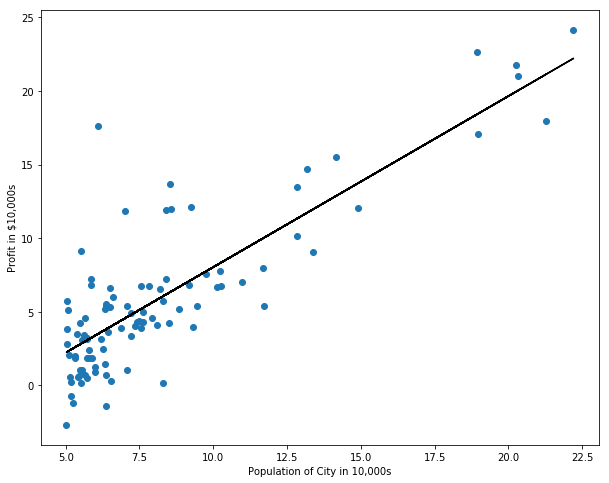

In [18]:
import seaborn as nsn
x=df.Population
y=df.Profit
for i in range(1500):
    if(i==0):
        plt.scatter(x,y)
        plt.xlabel('Population of City in 10,000s')
        plt.ylabel('Profit in $10,000s')
        plt.plot(x,theta_array[i][0]+theta_array[i][1]*x,'black')
        plt.show()

    if i%100==0:
        plt.scatter(x,y)
        plt.xlabel('Population of City in 10,000s')
        plt.ylabel('Profit in $10,000s')
        plt.plot(x,theta_array[i][0]+theta_array[i][1]*x,'black')
        
        plt.show()
        

    
